In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [5]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [6]:
pp.ProfileReport(train)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


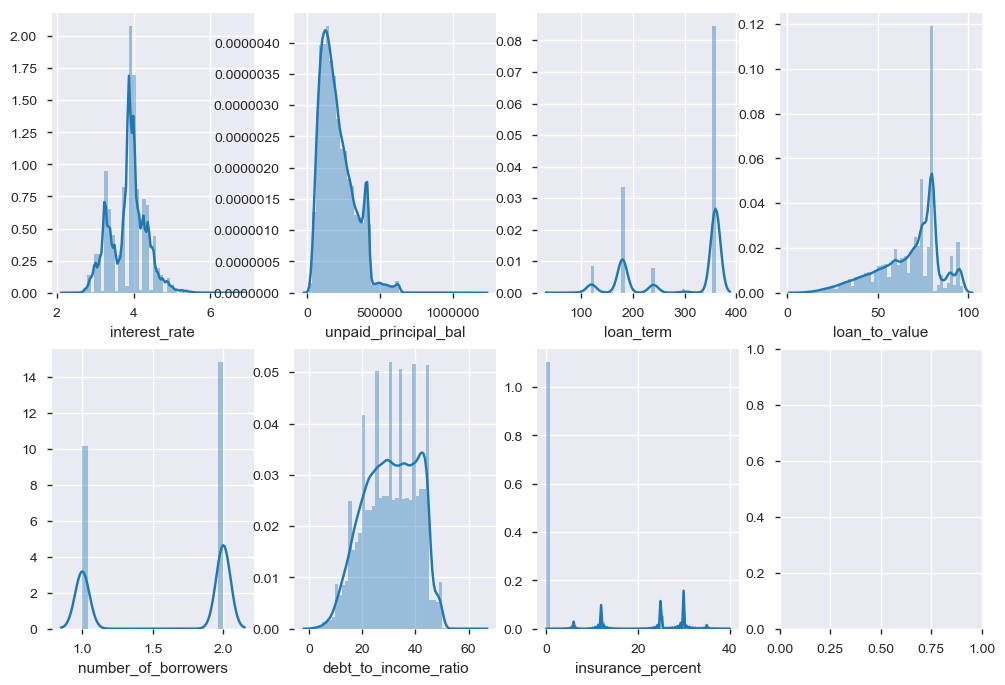

In [7]:
f, axes = plt.subplots(2,4,figsize=(12, 8))
sns.distplot(train.interest_rate,ax=axes[0][0])
sns.distplot(train.unpaid_principal_bal,ax=axes[0][1])
sns.distplot(train.loan_term,ax = axes[0][2])
sns.distplot(train.loan_to_value,ax = axes[0][3])
sns.distplot(train.number_of_borrowers,ax = axes[1][0])
sns.distplot(train.debt_to_income_ratio,ax = axes[1][1])
sns.distplot(train.insurance_percent,ax = axes[1][2])


In [8]:
loann=pd.read_csv('train.csv')

In [ ]:
loannt=pd.read_csv('test.csv')

In [ ]:
d_test['loan_to_value']=loannt['loan_to_value']

In [ ]:
d_train['loan_to_value']=np.log(d_train['loan_to_value'])

In [ ]:
d_test['loan_to_value']=np.log(d_test['loan_to_value'])

In [ ]:
train['unpaid_principal_bal']=np.log(train['unpaid_principal_bal'])

In [ ]:
test['unpaid_principal_bal']=np.log(test['unpaid_principal_bal'])

In [ ]:
train.isnull().sum()

In [ ]:
train.info()

In [ ]:
train['loan_purpose'].unique()

In [ ]:
train['financial_institution'].unique()

In [10]:
newtrain=train.drop(['loan_id','financial_institution'],axis=1)

In [11]:
newtest=test.drop(['loan_id','financial_institution'],axis=1)

In [12]:
newtrain['origination_date']=pd.to_datetime(newtrain['origination_date'])

In [13]:
newtrain['first_payment_date']=pd.to_datetime(newtrain['first_payment_date'])

In [14]:
newtest['origination_date']=pd.to_datetime(newtest['origination_date'])

In [15]:
newtrain=train.drop('first_payment_date',axis=1)

In [16]:
newtest=test.drop('first_payment_date',axis=1)

In [17]:
dummy_train=pd.get_dummies(newtrain)

In [18]:
dummy_test=pd.get_dummies(newtest)

In [ ]:
dummy_train.columns

In [ ]:
dummy_test.columns

In [ ]:
X= dummy_train.drop('m13',axis=1)
y=dummy_train.m13

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
scaled_train=pd.DataFrame(sc.fit_transform(d_train),columns=d_train.columns)

In [ ]:
scaled_test=pd.DataFrame(sc.fit_transform(d_test),columns=d_test.columns)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [21]:
X= dummy_train.drop('m13',axis=1)
y=dummy_train.m13

In [ ]:
m2=rf.fit(X,y)

In [ ]:
pred1=m2.predict(dummy_test)

In [ ]:
solution=pd.DataFrame({'loan_id':test.loan_id,'m13':pred1})

In [ ]:
solution.to_csv('loan random forest.csv',index=False)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [20]:
m3=knn.fit(X,y)

NameError: name 'X' is not defined

In [ ]:
pred2=m3.predict(dummy_test)

In [ ]:
solution2=pd.DataFrame({'loan_id':test.loan_id,'m13':pred2})

In [ ]:
solution2.to_csv('loan knn.csv',index=False)

In [ ]:
dum_train=dummy_train.drop(['financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',
       'financial_institution_Suarez Inc',
       'financial_institution_Swanson, Newton and Miller',
       'financial_institution_Taylor, Hunt and Rodriguez',
       'financial_institution_Thornton-Davis',
       'financial_institution_Turner, Baldwin and Rhodes',
       ],axis=1)

In [ ]:
dum_test=dummy_test.drop(['financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',
       'financial_institution_Suarez Inc',
       'financial_institution_Swanson, Newton and Miller',
       'financial_institution_Taylor, Hunt and Rodriguez',
       'financial_institution_Thornton-Davis',
       'financial_institution_Turner, Baldwin and Rhodes',
       ],axis=1)

In [ ]:
X= dum_train.drop('m13',axis=1)
y=dum_train.m13

In [ ]:
m4=knn.fit(X,y)

In [ ]:
pred3=m4.predict(dum_test)

In [ ]:
solution3=pd.DataFrame({'loan_id':test.loan_id,'m13':pred3})

In [ ]:
solution3.to_csv('loan knn 2.csv',index=False)

In [ ]:
x=dummy_train.drop('m13',axis=1)
y=dum_train.m13

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
m6=lg.fit(x,y)

In [ ]:
pred5=m6.predict(dummy_test)

In [ ]:
solution5=pd.DataFrame({'loan_id':test.loan_id,'m13':pred5})

In [ ]:
solution5.to_csv('loan log 2.csv',index=False)

In [ ]:
d_train=dum_train.drop('loan_id',axis=1)

In [ ]:
d_test=dum_test.drop('loan_id',axis=1)

In [ ]:
d_train.columns

In [ ]:
d_test.columns

In [ ]:
x1=d_train.drop('m13',axis=1)
y1=d_train.m13

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
m7=rfc.fit(x1,y1)

In [ ]:
pred6=m7.predict(d_test)

In [ ]:
solution6=pd.DataFrame({'loan_id':test.loan_id,'m13':pred6})

In [ ]:
solution6.to_csv('loan rfc balanced.csv',index=False)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
rf_bag=BaggingClassifier(base_estimator=rfc,n_estimators=25,random_state=100)

In [ ]:
rf_bag.fit(x1,y1)

In [ ]:
pred7=rf_bag.predict(d_test)

In [ ]:
solution7=pd.DataFrame({'loan_id':test.loan_id,'m13':pred7})

In [ ]:
solution7.to_csv('loan rfc bagg.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
boost_rf=AdaBoostClassifier(base_estimator=rfc,n_estimators=25,random_state=100)

In [ ]:
boost_rf.fit(x1,y1)

In [ ]:
pred8=boost_rf.predict(d_test)

In [ ]:
solution8=pd.DataFrame({'loan_id':test.loan_id,'m13':pred8})

In [ ]:
solution8.to_csv('loan rfc boost.csv',index=False)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
x2=d_train.drop('m13',axis=1)
y2=d_train.m13

In [ ]:
m9=rfc.fit(x2,y2)

In [ ]:
pred9=m9.predict(d_test)

In [ ]:
solution9=pd.DataFrame({'loan_id':test.loan_id,'m13':pred9})

In [ ]:
solution9.to_csv('loan rfc final.csv',index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)

In [ ]:
g=gb.fit(x2,y2)

In [ ]:
pred10=g.predict(d_test)

In [ ]:
solution10=pd.DataFrame({'loan_id':test.loan_id,'m13':pred10})

In [ ]:
solution10.to_csv('loan gb.csv',index=False)

In [ ]:
d_train.columns

In [ ]:
f_train=d_train.drop(['origination_date_2012-01-01', 'origination_date_2012-02-01',
       'origination_date_2012-03-01'],axis=1)

In [ ]:
d_test.columns

In [ ]:
f_test=d_test.drop(['origination_date_01/01/12',
       'origination_date_01/02/12', 'origination_date_01/03/12'],axis=1)

In [ ]:
d_train.columns

In [ ]:
f_train.columns

In [ ]:
f_test.columns

In [ ]:
x3=f_train.drop('m13',axis=1)
y3=f_train.m13

In [ ]:
m11=rfc.fit(x3,y3)

In [ ]:
pred11=m11.predict(f_test)

In [ ]:
solution11=pd.DataFrame({'loan_id':test.loan_id,'m13':pred11})

In [ ]:
solution11.to_csv('loan rf cat.csv',index=False)

In [ ]:
rf_bag2=BaggingClassifier(base_estimator=rfc)

In [ ]:
rf_bag2.fit(x3,y3)

In [ ]:
pred12=rf_bag2.predict(f_test)

In [ ]:
solution12=pd.DataFrame({'loan_id':test.loan_id,'m13':pred12})

In [ ]:
solution12.to_csv('loan rf bag 2.csv',index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(x1,y1)

In [ ]:
pred14=gnb.predict(d_test)

In [ ]:
solution14=pd.DataFrame({'loan_id':test.loan_id,'m13':pred14})

In [ ]:
solution14.to_csv('loan Naive Bayes 2.csv',index=False)